<a href="https://colab.research.google.com/github/solankinitin1210/Capstone-Project-Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Cardiovascular Risk Prediction </u></b>

## <b> Problem Description </b>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).


## <b> Data Description </b>

### <b>  The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.Variables Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.</b>


### <b>Attribute Information: </b>

## Demographic
* ### Sex : male or female("M" or "F")
* ### Age: Age of the patient (Continuous)

## Behavioral
* ### is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* ### Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(Continuous)
* ### BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* ### Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* ### Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* ### Diabetes: whether or not the patient had diabetes (Nominal)
* ### Tot Chol: total cholesterol level (Continuous)
* ### Sys BP: systolic blood pressure (Continuous)
* ### BMI: Body Mass Index (Continuous)
* ### Heart Rate: heart rate (Continuous)
* ### Glucose: glucose level (Continuous)

## Predict variable (desired target)
* ### 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)


In [ ]:
# Importing the libraries for process data
import pandas as pd
import numpy as np
from numpy import math

# Import libraries for ploting data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Mount driver
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import CSV file from drive 
df=pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Project-3/data_cardiovascular_risk.csv')

In [ ]:
# Let's check how our dataset look like
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
# Let's checke the null values for all the columns
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
# Let's check the statistics of columns
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
df['is_smoking'].unique()

array(['YES', 'NO'], dtype=object)

In [ ]:
x= df[df['is_smoking']=='YES'].cigsPerDay

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


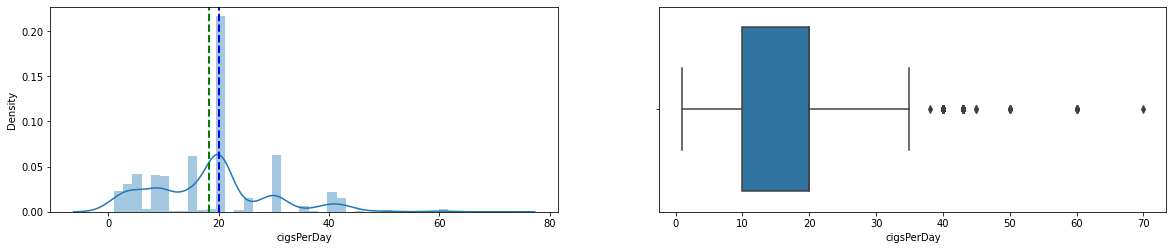

In [ ]:
plt.figure(figsize = (20,40))
plt.subplot(9,2,1)
sns.distplot(x)
plt.axvline(x.mean(), color='green', linestyle='dashed', linewidth=2)
plt.axvline(x.median(), color='blue', linestyle='dashed', linewidth=2)
plt.subplot(9,2,2)
sns.boxplot(x)
plt.show()

In [ ]:
df.drop(columns=['id','education'],inplace=True)

In [ ]:
df.groupby('sex').agg({'id':'count', 'TenYearCHD': 'sum'}).reset_index()

,sex,id,TenYearCHD
0,F,1923,239
1,M,1467,272
